In [1]:
# Mathematical foundations of neural nets
# Show netral networks representing a 1d function f: R -> R
# Train neural networks on samples of the functions -- regression
# Start with linear networks only with linear activations
# Then explore networks with relu activations and see how they fit 
# increasingly complicated functions
#
# Nicholas Miller (2023) In Jupyter Notebooks with Keras and Pyplot


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow.keras.initializers as init
import matplotlib.pyplot as plt

In [2]:
# Set up samples for training and test sets
# Training samples from the domain
# Start label with simple linear funxtion y = 0.8 * x
X_train = [[x/199. - 0.5] for x in range(200)]
linear_Y_train = [[0.8 * x_i[0]] for x_i in X_train]

X_test = [[x/199. + .0025 - 0.5] for x in range(0, 200, 10)]
X_test_extra = [[x_i[0] + 0.4] for x_i in X_test]


Text(0.5, 1.0, 'Training data x,y')

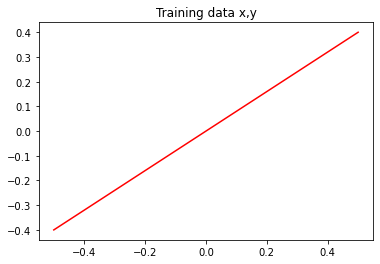

In [3]:
# Show the training data X, Y
plt.plot(X_train, linear_Y_train, 'r-')
plt.title('Training data x,y')

In [4]:
# Obviously use a linear model to predict a linear function
# Model is still linear no matter how many layers since all activations are linear
linear_model = Sequential()
linear_model.add(Dense(5, input_dim=1, activation='linear'))
linear_model.add(Dense(1, activation='linear'))
linear_model.compile(loss='mean_squared_error', optimizer='adam')


2023-04-25 11:06:33.926925: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Fix the linear function with a linear model
linear_model.fit(X_train, linear_Y_train, epochs=250, shuffle=True, verbose=0)


2023-04-25 11:06:37.393835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-25 11:06:37.413854: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


In [6]:
# See how the fit worked by prediction the function on the test set
linear_Y_predict = linear_model.predict(X_test)


Text(0.5, 1.0, 'Linear model fit')

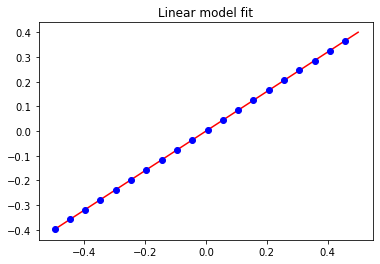

In [7]:
# plot prediction (blue) vs actual function (red line)
plt.plot(X_train, linear_Y_train, 'r-')
plt.plot(X_test, linear_Y_predict, 'bo')
plt.title('Linear model fit')

In [8]:
# If we try a linear model on a quadratic dataset -- the output will still be linear no matter the data
# It underfits
try_linear_model = Sequential()
try_linear_model.add(Dense(5, input_dim=1, activation='linear'))
try_linear_model.add(Dense(1, activation='linear'))
try_linear_model.compile(loss='mean_squared_error', optimizer='adam')

quadratic_Y_train = [[(x_i[0]-0.1)**2] for x_i in X_train]
try_linear_model.fit(X_train, quadratic_Y_train, epochs=250, shuffle=True, verbose=0)
try_quadratic = try_linear_model.predict(X_test)

Text(0.5, 1.0, 'Linear model to quadratic data')

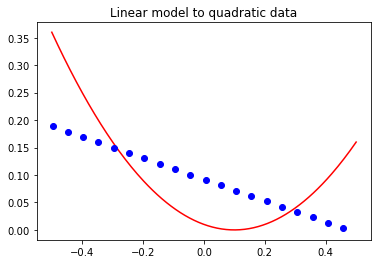

In [9]:
# underfit
plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test, try_quadratic, 'bo')
plt.title('Linear model to quadratic data')

In [158]:
# Lets use relu activations
# We can get one node with one relu activation to trivially learns relu -- relu(ax + b) with a=1, b=0
# Caveat: It seems we need to provide a reasonable starting points on a,b to converge
relu_Y_train = [[x_i[0] if x_i[0] > 0 else 0.] for x_i in X_train]
relu_model = Sequential()
relu_model.add(Dense(1, input_dim=1, kernel_initializer=init.Constant(0.9), bias_initializer=init.Constant(0.25), activation='relu'))
relu_model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=.2, momentum=.2))

relu_model.fit(X_train, relu_Y_train, epochs=200, batch_size=600, shuffle=True, verbose=0)

Text(0.5, 1.0, 'RELU model to RELU data')

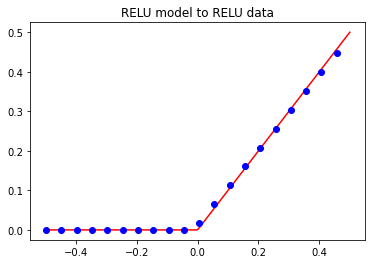

In [159]:
relu_predict = relu_model.predict(X_test)
plt.plot(X_train, relu_Y_train, 'r-')
plt.plot(X_test, relu_predict, 'bo')
plt.title('RELU model to RELU data')

In [ ]:
# To see in detail the loss and gradient w.r.t ab
# We can build models and meaure loss and plot it
import numpy as np
alist = []
blist = []
z = np.zeros(shape=(40, 40))
for i in range(0, 40):
    a = (i - 10.) / 20.
    alist.append(a)
    for j in range(0, 40):
        b = (j - 20) / 20.
        if i == 0: blist.append(b)
        debug_model = Sequential()
        debug_model.add(Dense(1, input_dim=1, kernel_initializer=init.Constant(a), bias_initializer=init.Constant(b), activation='relu'))
        debug_model.compile(loss='mean_squared_error', optimizer='adam')
        debug_predict = debug_model.predict(X_test)
        result = debug_model.evaluate(X_train, relu_Y_train)
        z[j, i] = result
        
ab_a, ab_b = np.meshgrid(alist, blist)


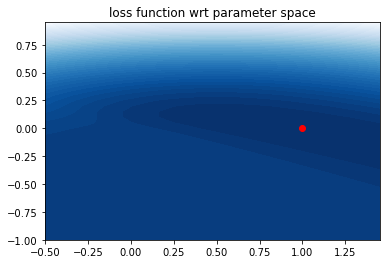

In [152]:
# Plot the loss of relu(ax + b) as a contour
# The optimal value is a=1 b=0 --> relu(x)
from matplotlib.cm import jet, Spectral_r, Blues_r
fig, ax = plt.subplots()
ax.contourf(ab_a, ab_b, z, levels=np.linspace(z.min(), z.max()), cmap=Blues_r)
ax.plot([1], [0], 'ro')
ax.set_title('loss function wrt parameter space')
ax.xaxis.set_label('a')
ax.yaxis.set_label('b')


In [15]:
# Transform relu a little and try to learn with 1 node and relu activations
trelu_Y_train = [[1 - x_i[0] if x_i[0] < 0. else 1.] for x_i in X_train]
trelu_model = Sequential()
trelu_model.add(Dense(1, input_dim=1, kernel_initializer=init.Constant(-1.2), bias_initializer=init.Constant(0.03), activation='relu'))
trelu_model.add(Dense(1, kernel_initializer=init.Constant(1.01), bias_initializer=init.Constant(0.99), activation='linear'))
trelu_model.compile(loss='mean_squared_error', optimizer='adam')

trelu_model.fit(X_train, trelu_Y_train, epochs=150, batch_size=400, shuffle=True, verbose=0)

Text(0.5, 1.0, 'RELU model with trivially transformed RELU data')

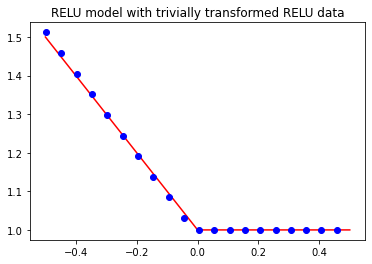

In [16]:
trelu_predict = trelu_model.predict(X_test)
plt.plot(X_train, trelu_Y_train, 'r-')
plt.plot(X_test, trelu_predict, 'bo')
plt.title('RELU model with trivially transformed RELU data')

In [21]:
# now use multi-layered relu network to learn the quadratic we failed at before
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(30, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, quadratic_Y_train, epochs=500, batch_size=200, verbose=0)


Text(0.5, 1.0, 'Example combinarion of 2 RELUs')

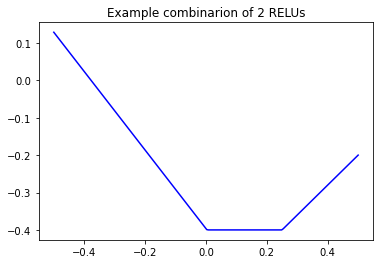

In [177]:
# Let's look at examples of linear combinations of 2 RELUs
# a1 * relu(u) + a2 * relu(v) + c
# Represents a neural net with a single linear output node with 2 input from 2 internal nodes
a1 = 1
a2 = .7
c = -.4
comb = [[ a1*(.8 * x_i[0] - .2 if .8 * x_i[0] - .2 > 0. else 0) + a2*(-1.5 * x_i[0] + .005 if -1.5 * x_i[0] + .005 > 0. else 0.) + c] for x_i in X_train]
plt.plot(X_train, comb, 'b-')
plt.title('Example combinarion of 2 RELUs')


In [ ]:
# It seems like more neural network layers and more nodes  --- adds 
# "more inflection points and more sloped regions"

In [ ]:
# now use multi-layered relu network to learn the quadratic we failed at before
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(30, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, quadratic_Y_train, epochs=500, batch_size=200, verbose=0)


Text(0.5, 1.0, 'Deep RELU model with quadratic data')

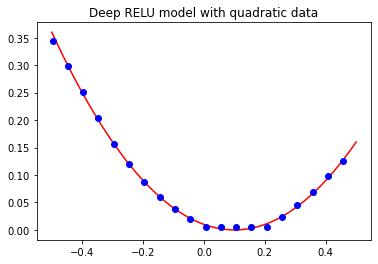

In [22]:
# predict based on the fitted 'quadratic' neural net
quadratic = model.predict(X_test)
plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test, quadratic, 'bo')
plt.title('Deep RELU model with quadratic data')

Text(0.5, 1.0, 'Deep RELU model extrapolating from quadratic data')

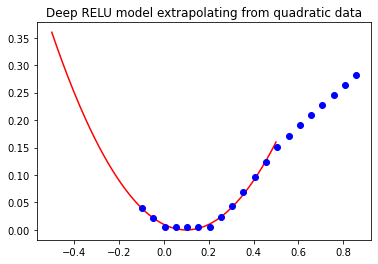

In [23]:
# see how well the function axtrapolates by predicint outside the bounds of the samples
quadratic_extra = model.predict(X_test_extra)
plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test_extra, quadratic_extra, 'bo')
plt.title('Deep RELU model extrapolating from quadratic data')

In [24]:
# now try a bigger deeper relu network and even more complex function -- sin(x)

from math import sin
from math import pi
sin_Y_train = [[sin(x_i[0] * 4*pi) * 0.5 + 0.5] for x_i in X_train]

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, sin_Y_train, epochs=750, batch_size=200, shuffle=True, verbose=0)

Text(0.5, 1.0, 'Deeper RELU model with sinusoidal data')

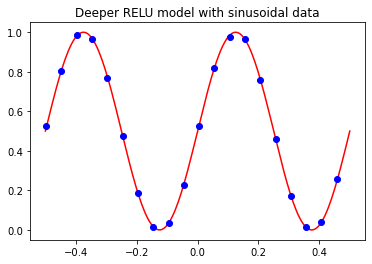

In [25]:
# predict on a model fitted to sin

mysin = model.predict(X_test)
plt.plot(X_train, sin_Y_train, 'r-')
plt.plot(X_test, mysin, 'bo')
plt.title("Deeper RELU model with sinusoidal data")

Text(0.5, 1.0, 'Deeper RELU model extrapulating from sinusoidal data')

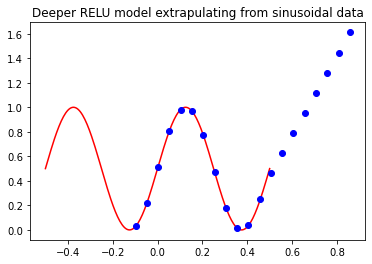

In [26]:
# see how sin extrapolates outside of the sample domain
sin_extra = model.predict(X_test_extra)
plt.plot(X_train, sin_Y_train, 'r-')
plt.plot(X_test_extra, sin_extra, 'bo')
plt.title("Deeper RELU model extrapulating from sinusoidal data")